In [11]:
# Movie Reviews Dataset Preprocessing
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

print("Libraries imported successfully!")


Libraries imported successfully!


In [12]:
# Load the dataset
df = pd.read_csv('movie_reviews-1.csv')

# Create a copy for before/after comparison
df_before = df.copy()

print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head(10))
print(f"\nDataset info:")
print(df.info())
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nRating statistics:")
print(df['rating'].describe())
print(f"\nSample review texts:")
for idx, text in enumerate(df['review_text'].head(5), 1):
    print(f"\nReview {idx}: {text}")


Dataset loaded successfully!

Dataset shape: (15, 3)

First few rows:
   review_id                review_text  rating
0          1      <p>Amazing movie!</p>     8.0
1          2  Terrible acting & plot!!!     2.0
2          3      <p>Amazing movie!</p>     NaN
3          4  Terrible acting & plot!!!     8.0
4          5      <p>Amazing movie!</p>     5.0
5          6  Terrible acting & plot!!!     2.0
6          7      <p>Amazing movie!</p>     8.0
7          8  Terrible acting & plot!!!     8.0
8          9      <p>Amazing movie!</p>    10.0
9         10  Terrible acting & plot!!!     5.0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    15 non-null     int64  
 1   review_text  15 non-null     object 
 2   rating       13 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 492.0+ bytes
None

Mi

In [13]:
# Step 1: Standardize review text by lowercasing and removing HTML tags

def clean_text(text):
    """
    Clean and standardize text:
    - Convert to lowercase
    - Remove HTML tags
    - Remove extra whitespace
    """
    if pd.isna(text):
        return ""
    
    # Convert to string and lowercase
    text = str(text).lower()
    
    # Remove HTML tags using regex
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply text cleaning
df['review_text_cleaned'] = df['review_text'].apply(clean_text)

print("Review text standardized!")
print(f"\nBefore and After comparison (first 10 rows):")
comparison_df = pd.DataFrame({
    'Original': df['review_text'].head(10),
    'Cleaned': df['review_text_cleaned'].head(10)
})
print(comparison_df.to_string(index=False))
print(f"\nSample transformations:")
for idx in range(min(5, len(df))):
    print(f"\nReview {idx+1}:")
    print(f"  Before: {df_before['review_text'].iloc[idx]}")
    print(f"  After:  {df['review_text_cleaned'].iloc[idx]}")


Review text standardized!

Before and After comparison (first 10 rows):
                 Original                   Cleaned
    <p>Amazing movie!</p>            amazing movie!
Terrible acting & plot!!! terrible acting & plot!!!
    <p>Amazing movie!</p>            amazing movie!
Terrible acting & plot!!! terrible acting & plot!!!
    <p>Amazing movie!</p>            amazing movie!
Terrible acting & plot!!! terrible acting & plot!!!
    <p>Amazing movie!</p>            amazing movie!
Terrible acting & plot!!! terrible acting & plot!!!
    <p>Amazing movie!</p>            amazing movie!
Terrible acting & plot!!! terrible acting & plot!!!

Sample transformations:

Review 1:
  Before: <p>Amazing movie!</p>
  After:  amazing movie!

Review 2:
  Before: Terrible acting & plot!!!
  After:  terrible acting & plot!!!

Review 3:
  Before: <p>Amazing movie!</p>
  After:  amazing movie!

Review 4:
  Before: Terrible acting & plot!!!
  After:  terrible acting & plot!!!

Review 5:
  Before: <p>Amazi

In [14]:
# Step 2: Tokenize and encode the reviews using TF-IDF
# TF-IDF (Term Frequency-Inverse Document Frequency) is an AI-assisted method
# that converts text into numerical features

# Initialize TF-IDF Vectorizer
# max_features limits the vocabulary size to most important words
# min_df ignores terms that appear in less than 1 document
# max_df ignores terms that appear in more than 95% of documents (removes common words)
tfidf_vectorizer = TfidfVectorizer(
    max_features=100,  # Top 100 most important words
    min_df=1,          # Word must appear in at least 1 document
    max_df=0.95,       # Word must appear in less than 95% of documents
    ngram_range=(1, 2), # Include unigrams and bigrams
    stop_words='english' # Remove common English stop words
)

# Fit and transform the cleaned review texts
tfidf_matrix = tfidf_vectorizer.fit_transform(df['review_text_cleaned'])

# Convert to DataFrame for easier handling
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=[f'tfidf_{i}' for i in range(tfidf_matrix.shape[1])]
)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

print("Reviews tokenized and encoded using TF-IDF!")
print(f"\nTF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"Number of features (words/ngrams): {len(feature_names)}")
print(f"\nTop 20 most important words/features:")
print(feature_names[:20])
print(f"\nTF-IDF features (first 5 rows, showing non-zero values only):")
# Show only non-zero values for first 5 reviews
for idx in range(min(5, len(tfidf_df))):
    non_zero = tfidf_df.iloc[idx][tfidf_df.iloc[idx] > 0]
    if len(non_zero) > 0:
        print(f"\nReview {idx+1} - Top TF-IDF features:")
        top_features = non_zero.nlargest(5)
        for feat_idx, value in top_features.items():
            feat_name = feature_names[int(feat_idx.split('_')[1])]
            print(f"  {feat_name}: {value:.4f}")


Reviews tokenized and encoded using TF-IDF!

TF-IDF matrix shape: (15, 8)
Number of features (words/ngrams): 8

Top 20 most important words/features:
['acting' 'acting plot' 'amazing' 'amazing movie' 'movie' 'plot'
 'terrible' 'terrible acting']

TF-IDF features (first 5 rows, showing non-zero values only):

Review 1 - Top TF-IDF features:
  amazing: 0.5774
  amazing movie: 0.5774
  movie: 0.5774

Review 2 - Top TF-IDF features:
  acting: 0.4472
  acting plot: 0.4472
  plot: 0.4472
  terrible: 0.4472
  terrible acting: 0.4472

Review 3 - Top TF-IDF features:
  amazing: 0.5774
  amazing movie: 0.5774
  movie: 0.5774

Review 4 - Top TF-IDF features:
  acting: 0.4472
  acting plot: 0.4472
  plot: 0.4472
  terrible: 0.4472
  terrible acting: 0.4472

Review 5 - Top TF-IDF features:
  amazing: 0.5774
  amazing movie: 0.5774
  movie: 0.5774


In [15]:
# Step 3: Handle missing ratings by filling them with the median value

# Calculate median rating
median_rating = df['rating'].median()

print(f"Missing ratings before filling: {df['rating'].isnull().sum()}")
print(f"Median rating: {median_rating:.2f}")

# Fill missing ratings with median
df['rating_filled'] = df['rating'].fillna(median_rating)

print(f"\nMissing ratings after filling: {df['rating_filled'].isnull().sum()}")
print(f"\nRating statistics before and after:")
print(f"Before filling:")
print(df['rating'].describe())
print(f"\nAfter filling:")
print(df['rating_filled'].describe())
print(f"\nRows with filled ratings:")
filled_mask = df['rating'].isnull()
if filled_mask.sum() > 0:
    print(df[filled_mask][['review_id', 'rating', 'rating_filled']])
else:
    print("No missing ratings found.")


Missing ratings before filling: 2
Median rating: 8.00

Missing ratings after filling: 0

Rating statistics before and after:
Before filling:
count    13.000000
mean      6.461538
std       2.933013
min       2.000000
25%       5.000000
50%       8.000000
75%       8.000000
max      10.000000
Name: rating, dtype: float64

After filling:
count    15.000000
mean      6.666667
std       2.768875
min       2.000000
25%       5.000000
50%       8.000000
75%       8.000000
max      10.000000
Name: rating_filled, dtype: float64

Rows with filled ratings:
    review_id  rating  rating_filled
2           3     NaN            8.0
14         15     NaN            8.0


In [16]:
# Step 4: Normalize ratings from 0-10 scale to 0-1 scale

# Using MinMaxScaler to normalize from [0, 10] to [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape for scaler (it expects 2D array)
rating_2d = df['rating_filled'].values.reshape(-1, 1)

# Fit and transform
df['rating_normalized'] = scaler.fit_transform(rating_2d)

# Alternative manual normalization: (x - min) / (max - min)
# Since we know the scale is 0-10, we can also do: rating / 10
df['rating_normalized_manual'] = df['rating_filled'] / 10.0

print("Ratings normalized from 0-10 scale to 0-1 scale!")
print(f"\nRating normalization comparison (first 10 rows):")
normalization_comparison = pd.DataFrame({
    'Original': df['rating'].head(10),
    'Filled': df['rating_filled'].head(10),
    'Normalized (0-1)': df['rating_normalized'].head(10)
})
print(normalization_comparison.to_string(index=False))
print(f"\nNormalized rating statistics:")
print(df['rating_normalized'].describe())
print(f"\nMin: {df['rating_normalized'].min():.4f}, Max: {df['rating_normalized'].max():.4f}")


Ratings normalized from 0-10 scale to 0-1 scale!

Rating normalization comparison (first 10 rows):
 Original  Filled  Normalized (0-1)
      8.0     8.0             0.750
      2.0     2.0             0.000
      NaN     8.0             0.750
      8.0     8.0             0.750
      5.0     5.0             0.375
      2.0     2.0             0.000
      8.0     8.0             0.750
      8.0     8.0             0.750
     10.0    10.0             1.000
      5.0     5.0             0.375

Normalized rating statistics:
count    15.000000
mean      0.583333
std       0.346109
min       0.000000
25%       0.375000
50%       0.750000
75%       0.750000
max       1.000000
Name: rating_normalized, dtype: float64

Min: 0.0000, Max: 1.0000


In [17]:
# Step 5: Create final preprocessed dataset

# Combine all processed features
final_dataset = pd.DataFrame({
    'review_id': df['review_id'],
    'review_text_original': df['review_text'],
    'review_text_cleaned': df['review_text_cleaned'],
    'rating_original': df['rating'],
    'rating_filled': df['rating_filled'],
    'rating_normalized': df['rating_normalized']
})

# Add TF-IDF features
final_dataset = pd.concat([final_dataset, tfidf_df], axis=1)

print("Final preprocessed dataset created!")
print(f"\nFinal dataset shape: {final_dataset.shape}")
print(f"\nColumn names:")
print(list(final_dataset.columns))
print(f"\nFirst 5 rows (showing main columns):")
print(final_dataset[['review_id', 'review_text_cleaned', 'rating_original', 
                      'rating_filled', 'rating_normalized']].head())


Final preprocessed dataset created!

Final dataset shape: (15, 14)

Column names:
['review_id', 'review_text_original', 'review_text_cleaned', 'rating_original', 'rating_filled', 'rating_normalized', 'tfidf_0', 'tfidf_1', 'tfidf_2', 'tfidf_3', 'tfidf_4', 'tfidf_5', 'tfidf_6', 'tfidf_7']

First 5 rows (showing main columns):
   review_id        review_text_cleaned  rating_original  rating_filled  \
0          1             amazing movie!              8.0            8.0   
1          2  terrible acting & plot!!!              2.0            2.0   
2          3             amazing movie!              NaN            8.0   
3          4  terrible acting & plot!!!              8.0            8.0   
4          5             amazing movie!              5.0            5.0   

   rating_normalized  
0              0.750  
1              0.000  
2              0.750  
3              0.750  
4              0.375  


In [18]:
# Step 6: Produce Before-vs-After Summary Report

print("="*80)
print("BEFORE vs AFTER SUMMARY REPORT")
print("="*80)

# 1. Dataset Overview
print("\n1. DATASET OVERVIEW")
print("-" * 80)
print(f"Total reviews: {len(df)}")
print(f"Before shape: {df_before.shape}")
print(f"After shape: {final_dataset.shape}")
print(f"New features added: {final_dataset.shape[1] - df_before.shape[1]}")

# 2. Text Standardization Improvements
print("\n2. TEXT STANDARDIZATION IMPROVEMENTS")
print("-" * 80)
print("✓ Converted all text to lowercase")
print("✓ Removed HTML tags (<p>, </p>, etc.)")
print("✓ Removed extra whitespace")
print(f"\nExample transformations:")
for idx in range(min(3, len(df))):
    print(f"\n  Review {idx+1}:")
    print(f"    Before: {df_before['review_text'].iloc[idx]}")
    print(f"    After:  {df['review_text_cleaned'].iloc[idx]}")

# 3. Text Encoding Improvements
print("\n3. TEXT ENCODING IMPROVEMENTS")
print("-" * 80)
print("✓ Tokenized reviews using TF-IDF vectorization")
print(f"✓ Created {len(feature_names)} numerical features from text")
print(f"✓ Used n-grams (unigrams and bigrams) for better context")
print(f"✓ Removed English stop words")
print(f"\nTop 10 most important words/features:")
for i, word in enumerate(feature_names[:10], 1):
    print(f"  {i}. {word}")

# 4. Missing Value Handling
print("\n4. MISSING VALUE HANDLING")
print("-" * 80)
missing_before = df_before['rating'].isnull().sum()
missing_after = final_dataset['rating_filled'].isnull().sum()
print(f"Missing ratings before: {missing_before}")
print(f"Missing ratings after: {missing_after}")
print(f"✓ Filled {missing_before} missing ratings with median value: {median_rating:.2f}")

# 5. Rating Normalization
print("\n5. RATING NORMALIZATION")
print("-" * 80)
print("✓ Normalized ratings from 0-10 scale to 0-1 scale")
print(f"  Original range: [{df_before['rating'].min():.1f}, {df_before['rating'].max():.1f}]")
print(f"  Normalized range: [{final_dataset['rating_normalized'].min():.4f}, {final_dataset['rating_normalized'].max():.4f}]")
print(f"\nRating distribution:")
print(f"  Mean (before): {df_before['rating'].mean():.2f}")
print(f"  Mean (after): {final_dataset['rating_normalized'].mean():.4f}")
print(f"  Std (before): {df_before['rating'].std():.2f}")
print(f"  Std (after): {final_dataset['rating_normalized'].std():.4f}")

# 6. Key Improvements Summary
print("\n6. KEY IMPROVEMENTS AND TRANSFORMATIONS")
print("-" * 80)
improvements = [
    ("Text Standardization", "Lowercased and removed HTML tags", "✓"),
    ("Text Encoding", f"Converted text to {len(feature_names)} TF-IDF features", "✓"),
    ("Missing Values", f"Filled {missing_before} missing ratings", "✓"),
    ("Rating Normalization", "Scaled from 0-10 to 0-1", "✓"),
    ("Feature Engineering", f"Created {len(feature_names)} numerical features", "✓"),
    ("Data Quality", "Improved consistency and ML-readiness", "✓")
]

for category, description, status in improvements:
    print(f"  {status} {category:25s} - {description}")

# 7. Dataset Readiness
print("\n7. DATASET READINESS FOR ML MODELS")
print("-" * 80)
print("✓ All text converted to numerical features (TF-IDF)")
print("✓ All missing values handled")
print("✓ Ratings normalized for better model performance")
print("✓ Dataset is ready for:")
print("    - Sentiment analysis models")
print("    - Rating prediction models")
print("    - Text classification models")
print("    - Recommendation systems")

print("\n" + "="*80)


BEFORE vs AFTER SUMMARY REPORT

1. DATASET OVERVIEW
--------------------------------------------------------------------------------
Total reviews: 15
Before shape: (15, 3)
After shape: (15, 14)
New features added: 11

2. TEXT STANDARDIZATION IMPROVEMENTS
--------------------------------------------------------------------------------
✓ Converted all text to lowercase
✓ Removed HTML tags (<p>, </p>, etc.)
✓ Removed extra whitespace

Example transformations:

  Review 1:
    Before: <p>Amazing movie!</p>
    After:  amazing movie!

  Review 2:
    Before: Terrible acting & plot!!!
    After:  terrible acting & plot!!!

  Review 3:
    Before: <p>Amazing movie!</p>
    After:  amazing movie!

3. TEXT ENCODING IMPROVEMENTS
--------------------------------------------------------------------------------
✓ Tokenized reviews using TF-IDF vectorization
✓ Created 8 numerical features from text
✓ Used n-grams (unigrams and bigrams) for better context
✓ Removed English stop words

Top 10 most im

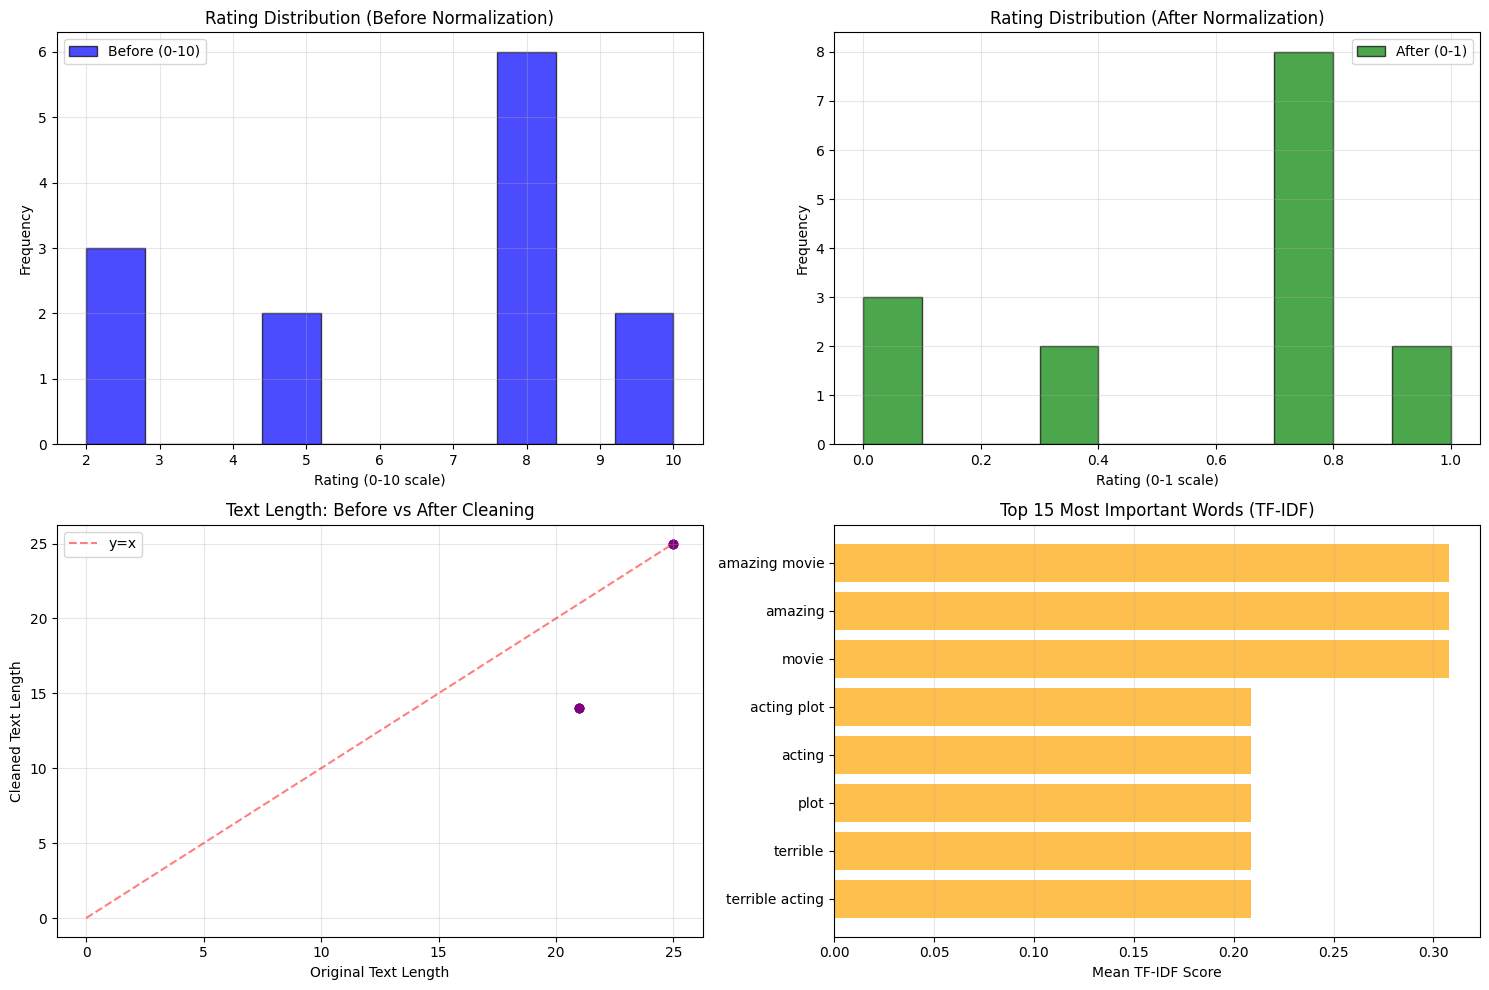

In [19]:
# Visualizations for Before vs After Comparison

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Rating distribution before and after normalization
axes[0, 0].hist(df_before['rating'].dropna(), bins=10, alpha=0.7, label='Before (0-10)', color='blue', edgecolor='black')
axes[0, 0].set_title('Rating Distribution (Before Normalization)')
axes[0, 0].set_xlabel('Rating (0-10 scale)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

axes[0, 1].hist(final_dataset['rating_normalized'], bins=10, alpha=0.7, label='After (0-1)', color='green', edgecolor='black')
axes[0, 1].set_title('Rating Distribution (After Normalization)')
axes[0, 1].set_xlabel('Rating (0-1 scale)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Plot 2: Text length comparison (before and after cleaning)
text_length_before = df_before['review_text'].str.len()
text_length_after = df['review_text_cleaned'].str.len()

axes[1, 0].scatter(text_length_before, text_length_after, alpha=0.6, color='purple')
axes[1, 0].plot([0, max(text_length_before.max(), text_length_after.max())], 
                [0, max(text_length_before.max(), text_length_after.max())], 
                'r--', alpha=0.5, label='y=x')
axes[1, 0].set_title('Text Length: Before vs After Cleaning')
axes[1, 0].set_xlabel('Original Text Length')
axes[1, 0].set_ylabel('Cleaned Text Length')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 3: TF-IDF feature importance (top 15 words)
# Calculate mean TF-IDF scores across all documents
mean_tfidf_scores = tfidf_df.mean().sort_values(ascending=False).head(15)
top_words = [feature_names[int(idx.split('_')[1])] for idx in mean_tfidf_scores.index]

axes[1, 1].barh(range(len(top_words)), mean_tfidf_scores.values, color='orange', alpha=0.7)
axes[1, 1].set_yticks(range(len(top_words)))
axes[1, 1].set_yticklabels(top_words)
axes[1, 1].set_title('Top 15 Most Important Words (TF-IDF)')
axes[1, 1].set_xlabel('Mean TF-IDF Score')
axes[1, 1].grid(True, alpha=0.3, axis='x')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()


In [20]:
# Save the cleaned dataset
output_filename = 'movie_reviews_cleaned.csv'
# Save main columns (excluding TF-IDF features for CSV readability)
main_columns = ['review_id', 'review_text_cleaned', 'rating_filled', 'rating_normalized']
final_dataset[main_columns].to_csv(output_filename, index=False)

# Save TF-IDF features separately
tfidf_filename = 'movie_reviews_tfidf_features.csv'
tfidf_df.to_csv(tfidf_filename, index=False)

print(f"Cleaned dataset saved to '{output_filename}'")
print(f"TF-IDF features saved to '{tfidf_filename}'")
print(f"\nDataset is ready for machine learning models!")
print(f"\nSummary:")
print(f"  - Main dataset: {len(main_columns)} columns")
print(f"  - TF-IDF features: {len(feature_names)} columns")
print(f"  - Total features: {len(main_columns) + len(feature_names)} columns")


Cleaned dataset saved to 'movie_reviews_cleaned.csv'
TF-IDF features saved to 'movie_reviews_tfidf_features.csv'

Dataset is ready for machine learning models!

Summary:
  - Main dataset: 4 columns
  - TF-IDF features: 8 columns
  - Total features: 12 columns
